In [3]:
import sklearn.datasets as d
from sklearn import svm

X, y = d.make_moons(n_samples = 100, noise = 0.15, random_state = 42)

# SVM 객체 생성
# C: 오류를 허용하는 정도. 높을수록 엄격. 기본값은 1.
# kernel에 poly를 적용 : 다항식 커널
svm_clf = svm.SVC(C = 10, kernel = "poly", degree = 3, coef0 = 1, gamma = "auto")
clf = svm_clf.fit(X, y)

In [4]:
import sklearn.datasets as d
from sklearn import svm

X, y = d.make_moons(n_samples = 100, noise = 0.15, random_state = 42)

svm_clf = svm.SVC(C = 10, kernel = "rbf", gamma = "auto")

clf = svm_clf.fit(X, y)

# 실습

### IRIS 데이터의 꽃잎의 길이와 너비를 특성으로 하여
### RBF 커널을 적용한 비선형 SVM 분류를 수행하시오
### 검증 정확도, 오차 행렬 또는 보고서 형태의 지표 출력,
### 그래프 시각화를 결과로 도출하십시오
### (결정 경계를 표시하십시오)

In [6]:
import sklearn.datasets as d
import sklearn.model_selection as ms
from sklearn import svm
import sklearn.metrics as mt
import numpy as np
import matplotlib.pyplot as plt

In [7]:
iris = d.load_iris()
X = iris.data[:, (2,3)]
y = iris.target

# gamma와 C의 초기값(둘다 기본값이지만 명시화해줌)
g = 0.5  # 기본값 = 'auto' = 0.5
c = 1

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 0)

svm_clf = svm.SVC(kernel = 'rbf', gamma = g, C = c)
clf = svm_clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

acc = mt.accuracy_score(y_test, y_pred)
mat = mt.confusion_matrix(y_test, y_pred)
rep = mt.classification_report(y_test, y_pred)

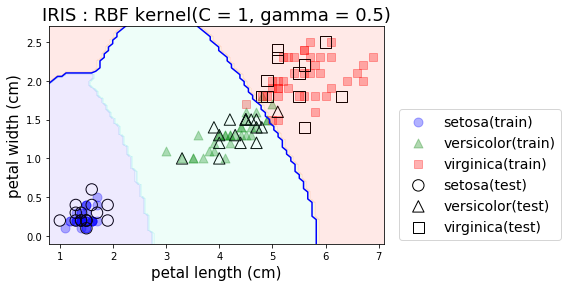

In [8]:
cset = ['blue', 'green', 'red']
mset = ['o', '^', 's']
lset = iris.target_names


# 훈련(학습) 데이터를 그리기
for t in set(y_train) :
    X_points = [X_train[i][0] for i in range(len(y_train)) if y_train[i] == t]
    Y_points = [X_train[i][1] for i in range(len(y_train)) if y_train[i] == t]
    plt.scatter(X_points, Y_points, color = cset[t], 
                marker = mset[t], label = lset[t] + "(train)", 
                s = 80, alpha = 0.3)
    

# 검증 데이터를 그리기
for t in set(y_test) :
    X_points = [X_test[i][0] for i in range(len(y_test)) if y_test[i] == t]
    Y_points = [X_test[i][1] for i in range(len(y_test)) if y_test[i] == t]
    plt.scatter(X_points, Y_points,  
                marker = mset[t], label = lset[t] + "(test)", 
                s = 130, edgecolors = 'black', facecolors = 'none')


# 좌표계 : np.linspace(시작점, 끝점, 개수)
x1s = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100)
x2s = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100)


X1, X2 = np.meshgrid(x1s, x2s)
XX = np.vstack([X1.ravel(), X2.ravel()]).transpose()

# 높이
YY = clf.predict(XX)
yy = YY.reshape(X1.shape)

# 등고선(가로, 세로, 높이). levels : yy별로 각 리스트의 원소 대로 cut해줌.
plt.contour(x1s, x2s, yy, levels = [0, 1, 2], colors = cset)
# 색깔 칠하기
plt.contourf(x1s, x2s, yy, cmap = plt.cm.rainbow, alpha = 0.1)

# 레이블
plt.xlabel(iris.feature_names[2], fontsize = 15)
plt.ylabel(iris.feature_names[3], fontsize = 15)
plt.title("IRIS : RBF kernel(C = {}, gamma = {})".format(c, g), fontsize = 18)
plt.legend(loc = 'best', fontsize = 14, bbox_to_anchor = (1.55, 0.65))

# 가로축, 세로축 표현 좌표계 범위 줄이기 : plt.axis([])
plt.axis([X[:, 0].min() - 0.2, X[:, 0].max() + 0.2, X[:, 1].min() - 0.2, X[:, 1].max() + 0.2])

plt.show()

In [ ]:
# c, gamma, kernel 바꿔서 해보기